In [0]:
import os
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

x_test[0].shape

(28, 28)

In [0]:
from random import shuffle, random

In [0]:
def simg(img):
  ysize, xsize = img.shape
  result = np.ones((ysize, xsize))
  ysize = int(ysize/2)
  xsize = int(xsize/2)
  parts = []
  for i in range(2):
    for j in range(2):
      parts.append(img[ysize * i: ysize * (i+1), xsize * j: xsize * (j+1)])

  shuffle(parts)

  for num, i in enumerate(parts):
    result[ysize * int(num/2): ysize * (int(num/2) + 1), xsize * (num%2): xsize * ((num%2) + 1)] *= i

  return result

In [0]:
def reimage(img, arr):
  ysize, xsize = img.shape
  result = np.ones((ysize, xsize))
  ysize = int(ysize/2)
  xsize = int(xsize/2)
  parts = []
  for i in range(2):
    for j in range(2):
      parts.append(img[ysize * i: ysize * (i+1), xsize * j: xsize * (j+1)])
    
  for num, i in enumerate(arr):
    result[ysize * int(num/2): ysize * (int(num/2) + 1), xsize * (num%2): xsize * ((num%2) + 1)] *= parts[i]

  return result

In [0]:
def makeDS(X):
  xarr = []
  yarr = []

  for i in X:
    if random() > 0.5:
      xarr.append(i)
      yarr.append(0)
    else:
      xarr.append(simg(i))
      yarr.append(1)

  return (xarr, yarr)

In [0]:
X_ori = np.concatenate([x_train, x_test], axis=0)

X, Y = makeDS(X_ori)

len(X)

70000

In [0]:
from sklearn.preprocessing import Normalizer

preprocesser = Normalizer()

Xshape = X_ori.shape

X_rs = X_ori.reshape(-1, 784)

X_rs = preprocesser.transform(X_rs)

X_ori = X_rs.reshape(Xshape)

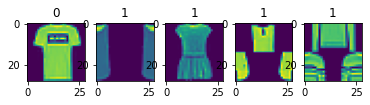

In [0]:
for i in range(1,6):
  ax = plt.subplot(1, 5, i)
  ax.imshow(X[i])
  ax.set_title(Y[i])

plt.show()

In [0]:
X = np.array(X)

In [0]:
from tensorflow.keras.models import model_from_json

finder_json = open('/content/drive/My Drive/puzzle data/puzzle_finder.json', 'r').read()
clear_json  = open('/content/drive/My Drive/puzzle data/puzzle_clear.json', 'r').read()

finder = model_from_json(finder_json)
clear  = model_from_json(clear_json)

finder.load_weights('/content/drive/My Drive/puzzle data/puzzle_finder.h5')
clear.load_weights('/content/drive/My Drive/puzzle data/puzzle_clear.h5')

In [0]:
X.shape

(70000, 28, 28)

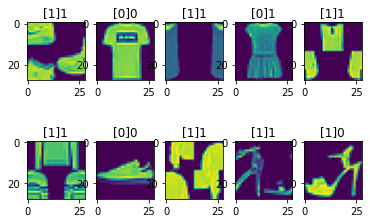

In [0]:
pf = (finder.predict(X[:10]) > 0.5).astype(np.uint8)

for i in range(1,6):
  ax = plt.subplot(2, 5, i)
  ax.imshow(X[i - 1])
  ax.set_title(str(pf[i - 1]) + str(Y[i - 1]))

for i in range(6,11):
  ax = plt.subplot(2, 5, i)
  ax.imshow(X[i - 1])
  ax.set_title(str(pf[i - 1]) + str(Y[i - 1]))

plt.show()

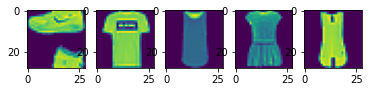

In [0]:
pc = np.argmax(clear.predict(X[:10]), axis=2)

for i in range(1,6):
  ax = plt.subplot(1, 5, i)
  ax.imshow(reimage(X[i - 1], pc[i - 1]))
plt.show()